In [1]:
import pandas as pd

# APIs

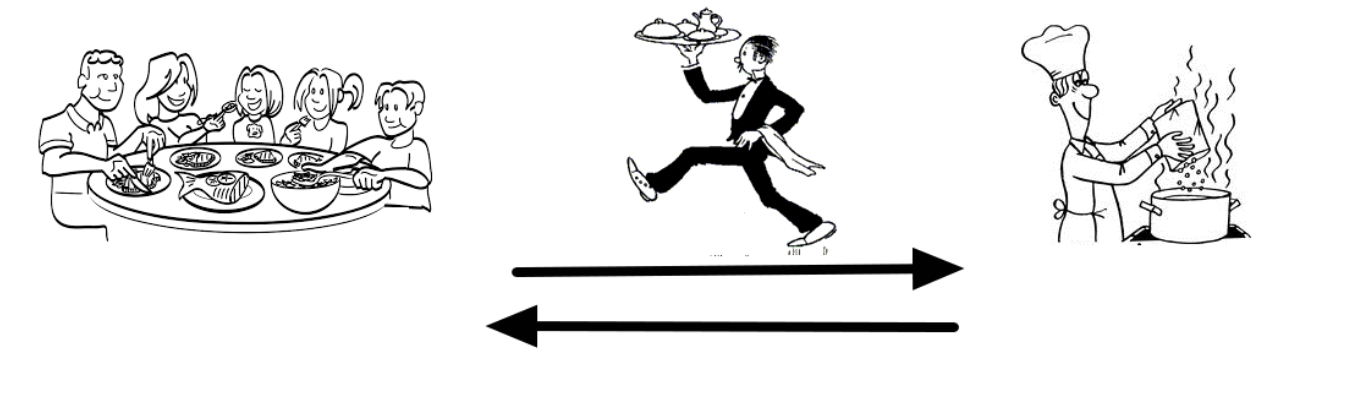

`client`: O cliente

`api`: O garçom

`o serviço (banco de dados, web application, twitter, spotify)`: O pizzaiolo

# Web APIs

## API endpoints

**NASA API**: http://api.open-notify.org/
- http://api.open-notify.org/iss-now.json
    - Documentation: http://open-notify.org/Open-Notify-API/ISS-Location-Now/

## Meme API

http://apimeme.com/?ref=apilist.fun

http://apimeme.com/meme?meme=Doge&top=Andre&bottom=Aguiar
    

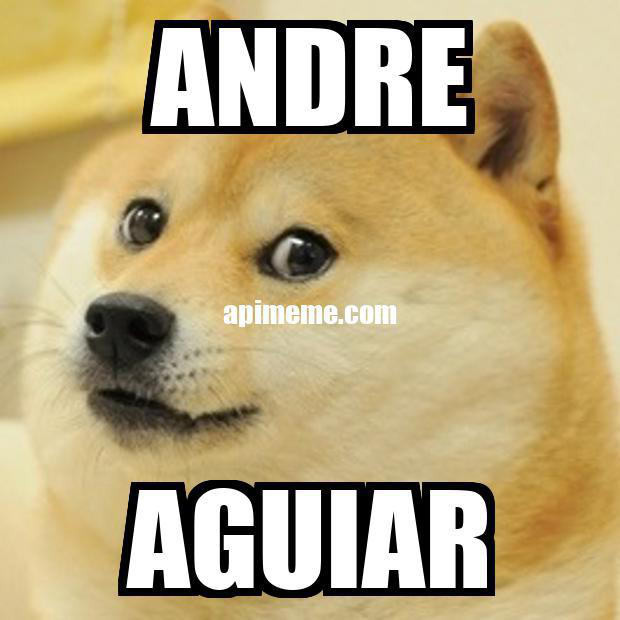

In [2]:
url = 'http://apimeme.com/meme?meme=Doge&top=Andre&bottom=Aguiar'

import urllib
from PIL import Image
image = Image.open(urllib.request.urlopen(url))
image

In [3]:
import requests

In [4]:
response = requests.get('http://api.open-notify.org/iss-now.json')

In [5]:
response

<Response [200]>

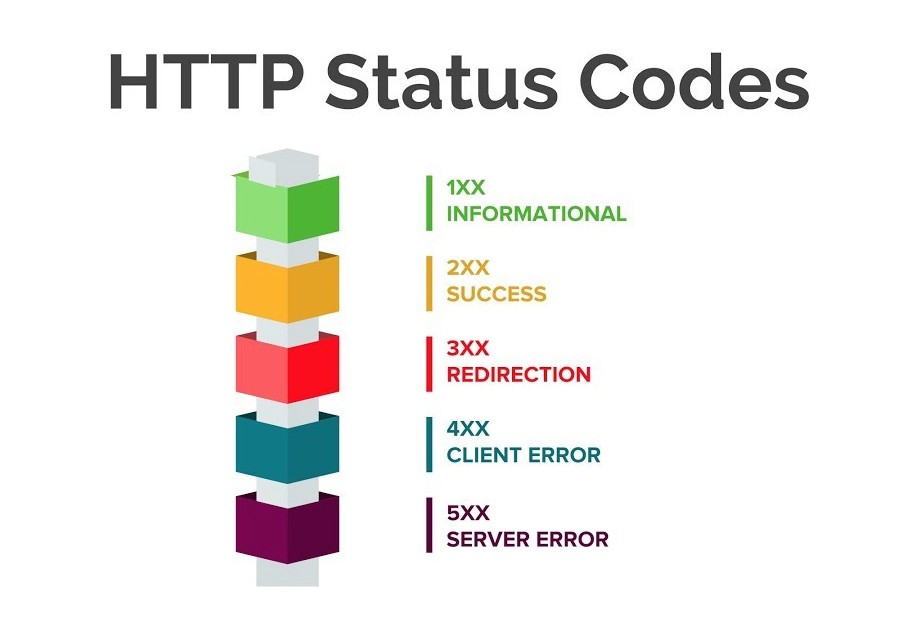

https://www.tutorialspoint.com/http/http_status_codes.htm

In [6]:
response = requests.get('http://api.open-notify.org/iss-later.json')
response

<Response [404]>

In [7]:
response = requests.get('http://api.open-notify.org/iss-now.json')
response

<Response [200]>

In [8]:
type(response)

requests.models.Response

In [9]:
response.text

'{"iss_position": {"latitude": "51.5170", "longitude": "5.9425"}, "timestamp": 1599700330, "message": "success"}'

In [10]:
response.json()['iss_position']['latitude']

'51.5170'

In [11]:
type(response.json())

dict

In [12]:
response.text

'{"iss_position": {"latitude": "51.5170", "longitude": "5.9425"}, "timestamp": 1599700330, "message": "success"}'

In [13]:
results = response.json()
results

{'iss_position': {'latitude': '51.5170', 'longitude': '5.9425'},
 'timestamp': 1599700330,
 'message': 'success'}

In [14]:
long = float(results['iss_position']['longitude'])
lat = float(results['iss_position']['latitude'])

In [15]:
lat, long

(51.517, 5.9425)

In [16]:
response = requests.get(f'http://api.open-notify.org/iss-pass.json?lat=-23.561721&lon=-46.66068')

In [17]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1599700331,
  'latitude': -23.561721,
  'longitude': -46.66068,
  'passes': 5},
 'response': [{'duration': 500, 'risetime': 1599735275},
  {'duration': 648, 'risetime': 1599740988},
  {'duration': 322, 'risetime': 1599746998},
  {'duration': 225, 'risetime': 1599764914},
  {'duration': 636, 'risetime': 1599770564}]}

In [18]:
results = response.json()

In [19]:
results['response']

[{'duration': 500, 'risetime': 1599735275},
 {'duration': 648, 'risetime': 1599740988},
 {'duration': 322, 'risetime': 1599746998},
 {'duration': 225, 'risetime': 1599764914},
 {'duration': 636, 'risetime': 1599770564}]

In [20]:
from datetime import datetime

In [21]:
times = results['response']

In [22]:
times

[{'duration': 500, 'risetime': 1599735275},
 {'duration': 648, 'risetime': 1599740988},
 {'duration': 322, 'risetime': 1599746998},
 {'duration': 225, 'risetime': 1599764914},
 {'duration': 636, 'risetime': 1599770564}]

In [23]:
hours = []

for time in times:
    hours.append(datetime.fromtimestamp(time['risetime']))
    
hours

[datetime.datetime(2020, 9, 10, 7, 54, 35),
 datetime.datetime(2020, 9, 10, 9, 29, 48),
 datetime.datetime(2020, 9, 10, 11, 9, 58),
 datetime.datetime(2020, 9, 10, 16, 8, 34),
 datetime.datetime(2020, 9, 10, 17, 42, 44)]

In [24]:
hours = [datetime.fromtimestamp(time['risetime']) for time in times]

In [25]:
times

[{'duration': 500, 'risetime': 1599735275},
 {'duration': 648, 'risetime': 1599740988},
 {'duration': 322, 'risetime': 1599746998},
 {'duration': 225, 'risetime': 1599764914},
 {'duration': 636, 'risetime': 1599770564}]

In [26]:
list(map(lambda x : datetime.fromtimestamp(x['risetime']), times))

[datetime.datetime(2020, 9, 10, 7, 54, 35),
 datetime.datetime(2020, 9, 10, 9, 29, 48),
 datetime.datetime(2020, 9, 10, 11, 9, 58),
 datetime.datetime(2020, 9, 10, 16, 8, 34),
 datetime.datetime(2020, 9, 10, 17, 42, 44)]

## Handling json files

- json_normalize

In [27]:
import pandas as pd

In [28]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1599700331,
  'latitude': -23.561721,
  'longitude': -46.66068,
  'passes': 5},
 'response': [{'duration': 500, 'risetime': 1599735275},
  {'duration': 648, 'risetime': 1599740988},
  {'duration': 322, 'risetime': 1599746998},
  {'duration': 225, 'risetime': 1599764914},
  {'duration': 636, 'risetime': 1599770564}]}

In [29]:
pd.json_normalize(response.json(), 'response')

,duration,risetime
0,500,1599735275
1,648,1599740988
2,322,1599746998
3,225,1599764914
4,636,1599770564


In [30]:
pd.json_normalize(response.json(), 'response')['risetime'].apply(lambda x : datetime.fromtimestamp(x) )

0   2020-09-10 07:54:35
1   2020-09-10 09:29:48
2   2020-09-10 11:09:58
3   2020-09-10 16:08:34
4   2020-09-10 17:42:44
Name: risetime, dtype: datetime64[ns]

## Create functions to wrap up the functionality of these endpoints

In [31]:
my_lat = 30
my_long = 80

In [32]:
response = requests.get(f'http://api.open-notify.org/iss-pass.json?lat={my_lat}&lon={my_long}')

In [33]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1599700334,
  'latitude': 30.0,
  'longitude': 80.0,
  'passes': 5},
 'response': [{'duration': 618, 'risetime': 1599700937},
  {'duration': 511, 'risetime': 1599749338},
  {'duration': 646, 'risetime': 1599755056},
  {'duration': 445, 'risetime': 1599761003},
  {'duration': 133, 'risetime': 1599773013}]}

In [34]:
pd.DataFrame(response.json()['response'])

,duration,risetime
0,618,1599700937
1,511,1599749338
2,646,1599755056
3,445,1599761003
4,133,1599773013


In [35]:
def get_iss_pass_times(my_lat, my_long):
    
    response = requests.get(f'http://api.open-notify.org/iss-pass.json?lat={my_lat}&lon={my_long}')
    df = pd.json_normalize(response.json(), 'response')
    df['risetime'] = df['risetime'].apply(lambda x : datetime.fromtimestamp(x))
    
    return df

In [36]:
get_iss_pass_times(-23, -68)

,duration,risetime
0,548,2020-09-10 09:27:15
1,634,2020-09-10 11:03:05
2,195,2020-09-10 12:44:20
3,278,2020-09-10 17:41:37
4,644,2020-09-10 19:16:03


In [37]:
def get_iss_pass_times(lat, long, alt=100):
    url = f'http://api.open-notify.org/iss-pass.json?lat={lat}&lon={long}&alt={alt}'
    response = requests.get(url)
    results = pd.json_normalize(response.json(), 'response')
    results['risetime'] = results['risetime'].apply(lambda x : datetime.fromtimestamp(x))
    
    return results

In [38]:
get_iss_pass_times(-23, -46)

,duration,risetime
0,521,2020-09-10 07:54:23
1,642,2020-09-10 09:29:51
2,267,2020-09-10 11:10:29
3,209,2020-09-10 16:08:56
4,636,2020-09-10 17:42:58


In [39]:
def get_number_astros():
    
    import requests
    people = requests.get('http://api.open-notify.org/astros.json')
    
    return people.json()['number']

In [40]:
get_number_astros()

3

In [41]:
class IronNASA():
    
    def __init__(self):
        print('Creating an interface for the NASA endpoints')
    
    def get_number_astros(self):
    
        import requests
        people = requests.get('http://api.open-notify.org/astros.json')

        return people.json()['number']
    
    
    def get_iss_pass_times(self, lat, long, alt=100):
        url = f'http://api.open-notify.org/iss-pass.json?lat={lat}&lon={long}&alt={alt}'
        response = requests.get(url)
        results = pd.json_normalize(response.json(), 'response')
        results['risetime'] = results['risetime'].apply(lambda x : datetime.fromtimestamp(x))

        return results

In [42]:
api = IronNASA()

Creating an interface for the NASA endpoints


In [43]:
api.get_number_astros()

3

In [44]:
api.get_iss_pass_times(-23, -46)

,duration,risetime
0,521,2020-09-10 07:54:23
1,642,2020-09-10 09:29:51
2,267,2020-09-10 11:10:29
3,209,2020-09-10 16:08:56
4,636,2020-09-10 17:42:58


What we have just done is an `API wrapper`.